# Quality Prediction in Mining Processing

In [1]:
# importing the libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading the dataset
data=pd.read_csv('mining.csv')

## Overview about the Data

In [3]:
# five elements from top
data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [4]:
# five elements from the end
data.tail()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786",...,"313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879",...,"236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397",...,"225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959",...,"308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"
737452,2017-09-09 23:00:00,"49,75","23,2","1164,12","468,019","384,801","9,61497","1,6531","300,355","292,865",...,"308,115","413,754","514,143","881,323","378,969","500,1","374,354","441,182","64,27","1,71"


In [5]:
# description of data
data.describe()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,...,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453
unique,4097,278,293,409317,319416,180189,131143,105805,43675,80442,...,86819,299573,331189,322315,309264,276051,301502,295667,38696,55569
top,2017-08-01 12:00:00,"64,03","6,26","2562,5","534,668","402,246","10,0591","1,75","299,927","255,322",...,"299,487","452,441","608,887","601,06","491,406","513,879","474,37","479,478","65,44","2,08"
freq,180,142560,142560,690,959,1735,1509,3214,13683,1487,...,3405,1013,817,989,733,709,746,905,16920,17100


In [6]:
# shape of the data
data.shape

(737453, 24)

In [7]:
# info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

In [8]:
# count of isnull values
data.isna().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

## Data Preprocessing and Feature Engineeerig

In [9]:
for col in data.columns:
    data[col]=data[col].apply(lambda x:x.replace(',','.'))

In [10]:
data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,...,248.071,451.24,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31


In [11]:
data['date']=data['date'].apply(lambda x:re.search('[0-9]*-[0-9]*',x).group(0))
data['year']=data['date'].apply(lambda x: re.search('^[^-]*',x).group(0))
data['month']=data['date'].apply(lambda x:re.search('[^-]*$',x).group(0))

In [12]:
data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,year,month
0,2017-03,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31,2017,03
1,2017-03,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31,2017,03
2,2017-03,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,...,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31,2017,03
3,2017-03,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31,2017,03
4,2017-03,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31,2017,03


In [13]:
data=data.drop('date',axis=1)
data=data.drop('year',axis=1)

In [14]:
data.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,month
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,457.396,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31,03
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,451.891,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31,03
2,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,250.313,...,451.24,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31,03
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,452.441,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31,03
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,452.441,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31,03


In [15]:
# converting string data to float data
data=data.astype(np.float)

## Visualisation

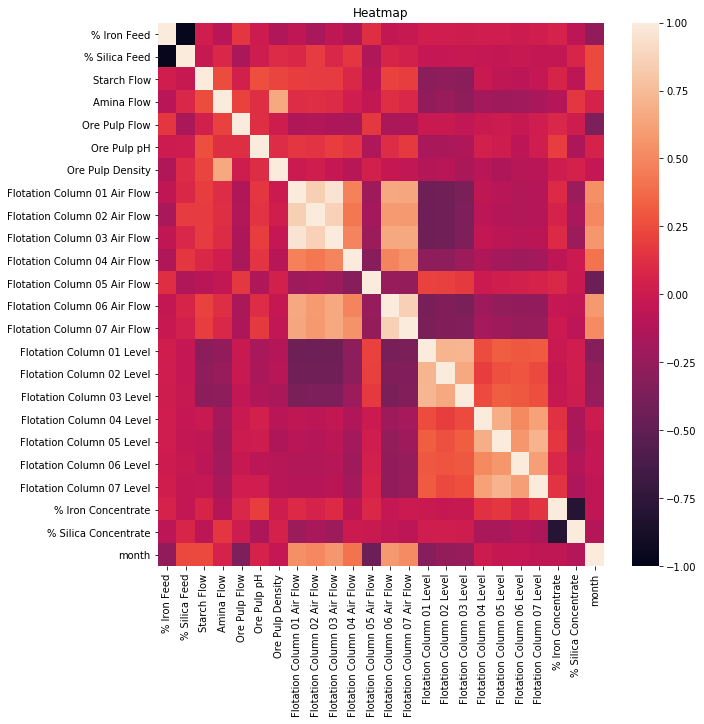

In [16]:
# heatmap of correlation data
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),vmin=-1,vmax=1)
plt.title("Heatmap")
plt.show()

## Splitting of the data

In [17]:
Y=data['% Silica Concentrate']
X=data.drop('% Silica Concentrate',axis=1)

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(X,Y,test_size=0.2,random_state=42)

In [20]:
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(589962, 23) (589962,)
(147491, 23) (147491,)


## Model Making

In [21]:
from sklearn.linear_model import LinearRegression
m1=LinearRegression()
m1.fit(xtrain,ytrain)
print("Model score is: ",m1.score(xtest,ytest))

Model score is:  0.6872415218337348
